In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras

Using TensorFlow backend.


In [0]:
data = pd.read_csv("/content/drive/My Drive/fma_metadata/features.csv", skiprows=[1,2,3])

In [0]:
data.head(10)

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,...,tonnetz.9,tonnetz.10,tonnetz.11,tonnetz.12,tonnetz.13,tonnetz.14,tonnetz.15,tonnetz.16,tonnetz.17,tonnetz.18,tonnetz.19,tonnetz.20,tonnetz.21,tonnetz.22,tonnetz.23,tonnetz.24,tonnetz.25,tonnetz.26,tonnetz.27,tonnetz.28,tonnetz.29,tonnetz.30,tonnetz.31,tonnetz.32,tonnetz.33,tonnetz.34,tonnetz.35,tonnetz.36,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658,0.692500,0.569344,0.597041,0.625864,0.567330,0.443949,0.487976,0.497327,0.574435,0.579241,0.620102,0.586945,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972,0.482825,0.387652,0.249082,...,0.318972,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,1.038253,1.292235,0.677641,0.584248,0.581271,0.581182,0.454241,0.464841,0.542833,0.664720,0.511329,0.530998,0.603398,0.547428,0.232784,0.229469,0.225674,0.216713,0.220512,0.242744,0.369235,0.420716,0.312129,0.242748,0.264292,0.225683,0.230579,0.228059,0.209370,...,0.214807,0.070261,0.070394,0.000183,0.006908,0.047025,-0.029942,0.017535,-0.001496,-0.000108,0.007161,0.046912,-0.021149,0.016299,-0.002657,-0.097199,-0.079651,-0.164613,-0.304375,-0.024958,-0.055667,0.265541,-0.131471,0.171930,-0.990710,0.574556,0.556494,0.026316,0.018708,0.051151,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141,0.611014,0.651471,0.494528,0.448799,0.468624,0.454021,0.497172,0.559755,0.671287,0.610565,0.551663,0.603413,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939,0.255472,0.293571,0.245253,...,0.180027,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,4.326824,1.300406,0.461840,0.540411,0.446708,0.647553,0.591908,0.513306,0.651501,0.516887,0.511479,0.478263,0.638766,0.638495,0.229882,0.286978,0.240096,0.226792,0.192443,0.288410,0.413348,0.349137,0.268424,0.243144,0.268941,0.236763,0.230555,0.280229,0.234060,...,0.192640,0.117094,0.059757,-0.021650,-0.018369,-0.003282,-0.074165,0.008971,0.007101,-0.021108,-0.019117,-0.007409,-0.067350,0.007036,0.006788,-0.107889,-0.194957,-0.273549,-0.343055,-0.052284,-0.029836,-0.135219,-0.275780,0.015767,-1.094873,1.164041,0.246746,0.021413,0.031989,0.088197,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294

In [0]:
data.shape

(106574, 519)

In [0]:
df = pd.read_csv('/content/drive/My Drive/fma_metadata/tracks.csv',skiprows=1)



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df = df.drop(0)
df = df.rename(columns={"Unnamed: 0" : "track_id"})
df = df[df['subset']=='small']

In [0]:
df.shape

(8000, 53)

In [0]:
df

,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway
16,140,1.0,2008-11-26 01:49:59,2007-05-22 00:00:00,NaN,1.0,61.0,<p>Alec K. Redfearn &amp; The Eyesores: Ellen ...,1300.0,"Alec K. Refearn, Rob Pemberton",[],The Blind Spot,1.0,Album,1999-01-01 00:00:00,NaN,NaN,<p>The Eyesores originally formed in 1997 orig...,0.0,2008-11-26 01:47:44,11.0,54.0,41.823989,"Providence, RI",-71.412834,NaN,Alec K. Redfearn & the Eyesores,"Haldols, Amoebic Ensemble, Mr. Gutter",['alec k redfearn and the eyesores'],http://www.aleckredfearn.com,http://en.wikipedia.org/wiki/Alec_K_Redfearn,training,small,128000.0,0.0,NaN,2008-11-26 01:44:07,2008-11-26 00:00:00,253.0,5.0,Folk,[17],[17],NaN,1593.0,en,Attribution-Noncommercial-No Derivative Works ...,1299.0,NaN,2.0,NaN,[],Queen Of The Wires
17,141,0.0,2008-11-26 01:49:57,2009-01-16 00:00:00,NaN,1.0,60.0,"<p>A full ensamble of strings, drums, electron...",1304.0,NaN,[],Every Man For Himself,2.0,Album,1999-01-01 00:00:00,NaN,NaN,<p>The Eyesores originally formed in 1997 orig...,0.0,2008-11-26 01:47:44,11.0,54.0,41.823989,"Providence, RI",-71.412834,NaN,Alec K. Redfearn & the Eyesores,"Haldols, Amoebic Ensemble, Mr. Gutter",['alec k redfearn and the eyesores'],http://www.aleckredfearn.com,http://en.wikipedia.org/wiki/Alec_K_Redfearn,training,small,128000.0,0.0,NaN,2008-11-26 01:44:10,2008-11-26 00:00:00,182.0,1.0,Folk,[17],[17],NaN,839.0,en,Attribution-Noncommercial-No Derivative Works ...,725.0,NaN,4.0,NaN,[],Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105714,154308,0.0,2017-03-05 04:57:38,2017-03-05 00:00:00,NaN,0.0,22780.0,Na

In [0]:
genres = list(df['genre_top'].unique())
genres

['Hip-Hop',
 'Pop',
 'Folk',
 'Experimental',
 'Rock',
 'International',
 'Electronic',
 'Instrumental']

In [0]:
genres.sort()
genres

['Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Pop',
 'Rock']

In [0]:
labels =  {genres[i]:i for i in range(len(genres))}
labels

{'Electronic': 0,
 'Experimental': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Instrumental': 4,
 'International': 5,
 'Pop': 6,
 'Rock': 7}

In [0]:
inv_labels = {i:genres[i] for i in range(len(genres))}
inv_labels

{0: 'Electronic',
 1: 'Experimental',
 2: 'Folk',
 3: 'Hip-Hop',
 4: 'Instrumental',
 5: 'International',
 6: 'Pop',
 7: 'Rock'}

In [0]:
train_df = df[(df['split'] == "training") | (df['split'] == "validation")]
test_df = df[df['split'] == "test"]

In [0]:
#File to Genre mapping
mapping = dict()
mapping = {str(i):j for i, j in zip(df['track_id'], df['genre_top'])}

In [0]:
mapping

In [0]:
dataframe = data[data['feature'] == mapping]

In [0]:
map1 = [ mapping[str(i)] if str(i) in mapping.keys() else None for i in data['feature'] ]

In [0]:
data['target'] = map1

In [0]:
map1

In [0]:
data1 = data.dropna()

In [0]:
data1

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,...,tonnetz.10,tonnetz.11,tonnetz.12,tonnetz.13,tonnetz.14,tonnetz.15,tonnetz.16,tonnetz.17,tonnetz.18,tonnetz.19,tonnetz.20,tonnetz.21,tonnetz.22,tonnetz.23,tonnetz.24,tonnetz.25,tonnetz.26,tonnetz.27,tonnetz.28,tonnetz.29,tonnetz.30,tonnetz.31,tonnetz.32,tonnetz.33,tonnetz.34,tonnetz.35,tonnetz.36,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6,target
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658,0.692500,0.569344,0.597041,0.625864,0.567330,0.443949,0.487976,0.497327,0.574435,0.579241,0.620102,0.586945,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972,0.482825,0.387652,0.249082,...,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141,0.611014,0.651471,0.494528,0.448799,0.468624,0.454021,0.497172,0.559755,0.671287,0.610565,0.551663,0.603413,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939,0.255472,0.293571,0.245253,...,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,4.326824,1.300406,0.461840,0.540411,0.446708,0.647553,0.591908,0.513306,0.651501,0.516887,0.511479,0.478263,0.638766,0.638495,0.229882,0.286978,0.240096,0.226792,0.192443,0.288410,0.413348,0.349137,0.268424,0.243144,0.268941,0.236763,0.230555,0.280229,0.234060,...,0.117094,0.059757,-0.021650,-0.018369,-0.003282,-0.074165,0.008971,0.007101,-0.021108,-0.019117,-0.007409,-0.067350,0.007036,0.006788,-0.107889,-0.194957,-0.273549,-0.343055,-0.052284,-0.029836,-0.135219,-0.275780,0.015767,-1.094873,1.164041,0.246746,0.021413,0.031989,0.088197,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop
15,140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,-0.645214,-0.291744,0.376830,0.663307,0.639544,0.716740,0.634958,0.635982,0.707938,0.555161,0.674663,0.666432,0.694809,0.698336,0.630086,0.161163,0.272767,0.295905,0.255588,0.260886,0.252854,0.193282,0.191970,0.291551,0.319938,0.198516,0.120607,0.127528,0.252775,0.269169,...,0.090695,0.069114,0.005231,-0.007988,-0.101991,0.003448,-0.006134,-0.002965,0.005078,-0.005567,-0.103448,0.014391,-0.006236,-0.001095,-0.157603,-0.144769,-0.453628,-0.493572,-0.108646,-0.110778,-0.139997,-0.457671,0.032967,-0.257770,0.018179,-0.515431,0.037419,0.037334,0.112224,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712,Folk
16,141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281

In [0]:
data2 = data1.reset_index().drop(columns='index')

In [0]:
data3 = data2.drop('feature', axis=1)

In [0]:
data3

,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,chroma_cens.39,...,tonnetz.10,tonnetz.11,tonnetz.12,tonnetz.13,tonnetz.14,tonnetz.15,tonnetz.16,tonnetz.17,tonnetz.18,tonnetz.19,tonnetz.20,tonnetz.21,tonnetz.22,tonnetz.23,tonnetz.24,tonnetz.25,tonnetz.26,tonnetz.27,tonnetz.28,tonnetz.29,tonnetz.30,tonnetz.31,tonnetz.32,tonnetz.33,tonnetz.34,tonnetz.35,tonnetz.36,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6,target
0,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658,0.692500,0.569344,0.597041,0.625864,0.567330,0.443949,0.487976,0.497327,0.574435,0.579241,0.620102,0.586945,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972,0.482825,0.387652,0.249082,0.238187,...,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop
1,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141,0.611014,0.651471,0.494528,0.448799,0.468624,0.454021,0.497172,0.559755,0.671287,0.610565,0.551663,0.603413,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939,0.255472,0.293571,0.245253,0.222065,...,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop
2,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,4.326824,1.300406,0.461840,0.540411,0.446708,0.647553,0.591908,0.513306,0.651501,0.516887,0.511479,0.478263,0.638766,0.638495,0.229882,0.286978,0.240096,0.226792,0.192443,0.288410,0.413348,0.349137,0.268424,0.243144,0.268941,0.236763,0.230555,0.280229,0.234060,0.226213,...,0.117094,0.059757,-0.021650,-0.018369,-0.003282,-0.074165,0.008971,0.007101,-0.021108,-0.019117,-0.007409,-0.067350,0.007036,0.006788,-0.107889,-0.194957,-0.273549,-0.343055,-0.052284,-0.029836,-0.135219,-0.275780,0.015767,-1.094873,1.164041,0.246746,0.021413,0.031989,0.088197,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop
3,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,-0.645214,-0.291744,0.376830,0.663307,0.639544,0.716740,0.634958,0.635982,0.707938,0.555161,0.674663,0.666432,0.694809,0.698336,0.630086,0.161163,0.272767,0.295905,0.255588,0.260886,0.252854,0.193282,0.191970,0.291551,0.319938,0.198516,0.120607,0.127528,0.252775,0.269169,0.259295,...,0.090695,0.069114,0.005231,-0.007988,-0.101991,0.003448,-0.006134,-0.002965,0.005078,-0.005567,-0.103448,0.014391,-0.006236,-0.001095,-0.157603,-0.144769,-0.453628,-0.493572,-0.108646,-0.110778,-0.139997,-0.457671,0.032967,-0.257770,0.018179,-0.515431,0.037419,0.037334,0.112224,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712,Folk
4,0.172898,-0.284804,-1.169662,-1.

In [0]:
data.head()

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,...,tonnetz.10,tonnetz.11,tonnetz.12,tonnetz.13,tonnetz.14,tonnetz.15,tonnetz.16,tonnetz.17,tonnetz.18,tonnetz.19,tonnetz.20,tonnetz.21,tonnetz.22,tonnetz.23,tonnetz.24,tonnetz.25,tonnetz.26,tonnetz.27,tonnetz.28,tonnetz.29,tonnetz.30,tonnetz.31,tonnetz.32,tonnetz.33,tonnetz.34,tonnetz.35,tonnetz.36,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6,target
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,1.347792,1.237658,0.692500,0.569344,0.597041,0.625864,0.567330,0.443949,0.487976,0.497327,0.574435,0.579241,0.620102,0.586945,0.474300,0.369816,0.236119,0.228068,0.222830,0.221415,0.229238,0.248795,0.196245,0.175809,0.200713,0.319972,0.482825,0.387652,0.249082,...,0.059690,0.069184,-0.002570,0.019296,0.010510,0.073464,0.009272,0.015765,-0.003789,0.017786,0.007311,0.067945,0.009488,0.016876,-0.059769,-0.091745,-0.185687,-0.140306,-0.048525,-0.089286,0.752462,0.262607,0.200944,0.593595,-0.177665,-1.424201,0.019809,0.029569,0.038974,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,Hip-Hop
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,1.038253,1.292235,0.677641,0.584248,0.581271,0.581182,0.454241,0.464841,0.542833,0.664720,0.511329,0.530998,0.603398,0.547428,0.232784,0.229469,0.225674,0.216713,0.220512,0.242744,0.369235,0.420716,0.312129,0.242748,0.264292,0.225683,0.230579,0.228059,0.209370,...,0.070261,0.070394,0.000183,0.006908,0.047025,-0.029942,0.017535,-0.001496,-0.000108,0.007161,0.046912,-0.021149,0.016299,-0.002657,-0.097199,-0.079651,-0.164613,-0.304375,-0.024958,-0.055667,0.265541,-0.131471,0.171930,-0.990710,0.574556,0.556494,0.026316,0.018708,0.051151,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,None
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,0.268932,1.125141,0.611014,0.651471,0.494528,0.448799,0.468624,0.454021,0.497172,0.559755,0.671287,0.610565,0.551663,0.603413,0.258420,0.303385,0.250737,0.218562,0.245743,0.236018,0.275766,0.293982,0.346324,0.289821,0.246368,0.220939,0.255472,0.293571,0.245253,...,0.072169,0.076847,-0.007501,-0.018525,-0.030318,0.024743,0.004771,-0.004536,-0.007385,-0.018953,-0.020358,0.024615,0.004868,-0.003899,-0.128391,-0.125289,-0.359463,-0.166667,-0.038546,-0.146136,1.212025,0.218381,-0.419971,-0.014541,-0.199314,-0.925733,0.025550,0.021106,0.084997,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861,Hip-Hop
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,4.326824,1.300406,0.461840,0.540411,0.446708,0.647553,0.591908,0.513306,0.651501,0.516887,0.511479,0.478263,0.638766,0.638495,0.229882,0.286978,0.240096,0.226792,0.192443,0.288410,0.413348,0.349137,0.268424,0.243144,0.268941,0.236763,0.230555,0.280229,0.234060,...,0.117094,0.059757,-0.021650,-0.018369,-0.003282,-0.074165,0.008971,0.007101,-0.021108,-0.019117,-0.007409,-0.067350,0.007036,0.006788,-0.107889,-0.194957,-0.273549,-0.343055,-0.052284,-0.029836,-0.135219,-0.275780,0.015767,-1.094873,1.164041,0.246746,0.021413,0.031989,0.088197,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800,Pop
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.0

In [0]:
X = data3.drop('target', axis = 1)
Y = data3['target']

In [0]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(trainX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [0]:
trainX.shape

(5600, 518)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn import metrics

In [0]:
logisitc = LogisticRegression(C=0.005)

In [0]:
logisitc.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
output = logisitc.predict(testX)

In [0]:
logisticscore = logisitc.fit(trainX, trainY).decision_function(testX)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
accuracy_score(testY, output)

0.5745833333333333

In [0]:
print(metrics.classification_report(testY, output))

               precision    recall  f1-score   support

   Electronic       0.57      0.59      0.58       291
 Experimental       0.50      0.39      0.44       286
         Folk       0.59      0.65      0.62       287
      Hip-Hop       0.60      0.74      0.66       308
 Instrumental       0.55      0.62      0.58       297
International       0.65      0.61      0.63       327
          Pop       0.41      0.22      0.28       297
         Rock       0.62      0.76      0.68       307

     accuracy                           0.57      2400
    macro avg       0.56      0.57      0.56      2400
 weighted avg       0.56      0.57      0.56      2400



In [0]:
precision

array([0.56535948, 0.5       , 0.59177215, 0.59685864, 0.54896142,
       0.65245902, 0.40506329, 0.62032086])

In [0]:
lda = LinearDiscriminantAnalysis().fit(trainX,trainY).decision_function(testX)

In [0]:
from sklearn.metrics import roc_curve
fpr1 = dict()
tpr1 = dict()
roc_auc1= dict()
for i in range(8):
    fpr1[i], tpr1[i], _ = roc_curve(onehot_encoded[:,i], lda[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

In [0]:
fpr1["micro"], tpr1["micro"], _ = roc_curve(onehot_encoded.ravel(), lda.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

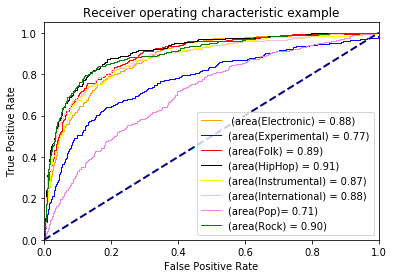

In [0]:
plt.figure()
plt.plot(fpr1[0], tpr1[0], color='orange',
         lw=1, label=' (area(Electronic) = %0.2f)' % roc_auc1[0])
plt.plot(fpr1[1], tpr1[1], color='blue',
         lw=1, label='(area(Experimental) = %0.2f)' % roc_auc1[1])

plt.plot(fpr1[2], tpr1[2], color='red',
         lw=1, label='(area(Folk) = %0.2f)' % roc_auc1[2])
plt.plot(fpr1[3], tpr1[3], color='black',
         lw=1, label='(area(HipHop) = %0.2f)' % roc_auc1[3])

plt.plot(fpr1[4], tpr1[4], color='yellow',
         lw=1, label='(area(Instrumental) = %0.2f)' % roc_auc1[4])
plt.plot(fpr1[5], tpr1[5], color='pink',
         lw=1, label='(area(International) = %0.2f)' % roc_auc1[5])

plt.plot(fpr1[6], tpr1[6], color='violet',
         lw=1, label='(area(Pop)= %0.2f)' % roc_auc1[6])
plt.plot(fpr1[7], tpr1[7], color='green',
         lw=1, label='(area(Rock) = %0.2f)' % roc_auc1[7])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
outputlda = lda.predict(testX)

In [0]:
accuracy_score(testY, outputlda)

0.5595833333333333

In [0]:
print(metrics.classification_report(testY, outputlda))

               precision    recall  f1-score   support

   Electronic       0.56      0.54      0.55       291
 Experimental       0.45      0.38      0.41       286
         Folk       0.64      0.60      0.62       287
      Hip-Hop       0.64      0.71      0.67       308
 Instrumental       0.56      0.57      0.57       297
International       0.67      0.62      0.64       327
          Pop       0.32      0.37      0.34       297
         Rock       0.65      0.67      0.66       307

     accuracy                           0.56      2400
    macro avg       0.56      0.56      0.56      2400
 weighted avg       0.56      0.56      0.56      2400



In [0]:
cm1 = metrics.confusion_matrix(testY, outputlda)

In [0]:
recall1 = np.diag(cm1) / np.sum(cm1, axis = 1)
precision1 = np.diag(cm1) / np.sum(cm1, axis = 0)

In [0]:
recall1

array([0.53608247, 0.38461538, 0.59930314, 0.70779221, 0.57239057,
       0.617737  , 0.36700337, 0.67100977])

In [0]:
precision1

array([0.56115108, 0.44715447, 0.6394052 , 0.63929619, 0.55921053,
       0.66887417, 0.31778426, 0.64984227])

In [0]:
knn = KNeighborsClassifier(n_neighbors=7).fit(trainX, trainY)

In [0]:
outputknn = knn.predict(testX)

In [0]:
accuracy_score(testY, outputknn)

0.4795833333333333

In [0]:
print(metrics.classification_report(testY, outputknn, digits=3))

               precision    recall  f1-score   support

   Electronic      0.521     0.378     0.438       291
 Experimental      0.449     0.276     0.342       286
         Folk      0.478     0.631     0.544       287
      Hip-Hop      0.489     0.597     0.538       308
 Instrumental      0.626     0.411     0.496       297
International      0.437     0.716     0.542       327
          Pop      0.299     0.273     0.285       297
         Rock      0.625     0.521     0.568       307

     accuracy                          0.480      2400
    macro avg      0.490     0.475     0.469      2400
 weighted avg      0.490     0.480     0.471      2400



In [0]:
cm2 = metrics.confusion_matrix(testY, outputknn)

In [0]:
recall2 = np.diag(cm2) / np.sum(cm2, axis = 1)
precision2 = np.diag(cm2) / np.sum(cm2, axis = 0)

In [0]:
recall2

array([0.37800687, 0.27622378, 0.63066202, 0.5974026 , 0.41077441,
       0.71559633, 0.27272727, 0.52117264])

In [0]:
precision2

array([0.52132701, 0.44886364, 0.47757256, 0.4893617 , 0.62564103,
       0.43656716, 0.29889299, 0.625     ])

In [0]:
nb = GaussianNB().fit(trainX, trainY)

In [0]:
outputnb = nb.predict(testX)

In [0]:
accuracy_score(testY, outputnb)

0.2945833333333333

In [0]:
print(metrics.classification_report(testY, outputnb))

               precision    recall  f1-score   support

   Electronic       0.56      0.08      0.14       291
 Experimental       0.50      0.09      0.15       286
         Folk       0.43      0.38      0.40       287
      Hip-Hop       0.54      0.05      0.09       308
 Instrumental       0.75      0.09      0.16       297
International       0.22      0.90      0.35       327
          Pop       0.18      0.16      0.17       297
         Rock       0.46      0.53      0.49       307

     accuracy                           0.29      2400
    macro avg       0.45      0.29      0.25      2400
 weighted avg       0.45      0.29      0.25      2400



In [0]:
dt = DecisionTreeClassifier(max_depth=6).fit(trainX, trainY)

In [0]:
outputdt = dt.predict(testX)

In [0]:
accuracy_score(testY, outputdt)

0.40958333333333335

In [0]:
print(metrics.classification_report(testY, outputdt))

               precision    recall  f1-score   support

   Electronic       0.37      0.44      0.40       291
 Experimental       0.50      0.20      0.29       286
         Folk       0.51      0.37      0.43       287
      Hip-Hop       0.42      0.47      0.44       308
 Instrumental       0.52      0.46      0.49       297
International       0.49      0.37      0.42       327
          Pop       0.21      0.37      0.27       297
         Rock       0.51      0.58      0.54       307

     accuracy                           0.41      2400
    macro avg       0.44      0.41      0.41      2400
 weighted avg       0.44      0.41      0.41      2400



In [0]:
svm = SVC(C=5.5).fit(trainX, trainY)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [0]:
svm1 = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, C = 5.5)).fit(trainX[1:100], trainY[1:100]).decision_function(testX)

In [0]:
outputsvm = svm1.predict(testX)

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], svm1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: ignored

In [0]:
accuracy_score(testY, outputsvm)

0.62

In [0]:
print(metrics.classification_report(testY, outputsvm))

               precision    recall  f1-score   support

   Electronic       0.56      0.64      0.60       291
 Experimental       0.46      0.55      0.50       286
         Folk       0.68      0.68      0.68       287
      Hip-Hop       0.68      0.68      0.68       308
 Instrumental       0.60      0.59      0.59       297
International       0.80      0.70      0.74       327
          Pop       0.48      0.43      0.45       297
         Rock       0.73      0.68      0.71       307

     accuracy                           0.62      2400
    macro avg       0.62      0.62      0.62      2400
 weighted avg       0.63      0.62      0.62      2400



In [0]:
y_score = svm.fit(trainX, trainY).decision_function(testX)

AttributeError: ignored

In [0]:
testlgbm

array([2, 0, 1, ..., 2, 0, 0], dtype=int8)

In [0]:
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(onehot_encoded[:,i], svm1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [0]:
fpr["micro"], tpr["micro"], _ = roc_curve(onehot_encoded.ravel(), svm1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
tasty = list(testY)

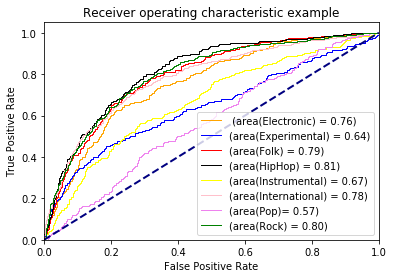

In [0]:
plt.figure()
plt.plot(fpr[0], tpr[0], color='orange',
         lw=1, label=' (area(Electronic) = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=1, label='(area(Experimental) = %0.2f)' % roc_auc[1])

plt.plot(fpr[2], tpr[2], color='red',
         lw=1, label='(area(Folk) = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='black',
         lw=1, label='(area(HipHop) = %0.2f)' % roc_auc[3])

plt.plot(fpr[4], tpr[4], color='yellow',
         lw=1, label='(area(Instrumental) = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='pink',
         lw=1, label='(area(International) = %0.2f)' % roc_auc[5])

plt.plot(fpr[6], tpr[6], color='violet',
         lw=1, label='(area(Pop)= %0.2f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='green',
         lw=1, label='(area(Rock) = %0.2f)' % roc_auc[7])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

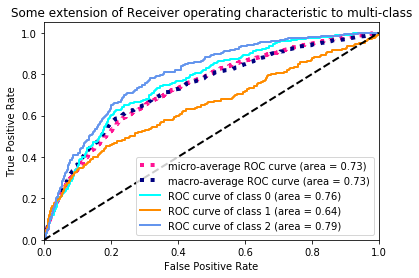

In [0]:
''': 'Electronic',
 1: 'Experimental',
 2: 'Folk',
 3: 'Hip-Hop',
 4: 'Instrumental',
 5: 'International',
 6: 'Pop',
 7: 'Rock'}'''

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


#data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(tasty)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['Folk' 'Electronic' 'Experimental' ... 'Folk' 'Electronic' 'Electronic']
[2 0 1 ... 2 0 0]
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
print(onehot_encoded)

[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)


In [0]:
pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(reg_alpha=1).fit(trainX, trainY)

In [0]:
outputxgb = xgb.predict(testX)

In [0]:
accuracy_score(testY, outputxgb)

0.5741666666666667

In [0]:
print(metrics.classification_report(testY, outputxgb))

               precision    recall  f1-score   support

   Electronic       0.55      0.61      0.58       291
 Experimental       0.54      0.40      0.46       286
         Folk       0.62      0.66      0.64       287
      Hip-Hop       0.63      0.67      0.65       308
 Instrumental       0.55      0.61      0.58       297
International       0.65      0.61      0.63       327
          Pop       0.40      0.34      0.37       297
         Rock       0.62      0.68      0.65       307

     accuracy                           0.57      2400
    macro avg       0.57      0.57      0.57      2400
 weighted avg       0.57      0.57      0.57      2400



In [0]:
lgbm = LGBMClassifier(boosting_type='goss', n_estimators=100)

In [0]:
lgbm.fit(trainX,trainY)

LGBMClassifier(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
outputlgbm = lgbm.predict(testX)

In [0]:
accuracy_score(testY, outputlgbm)

0.58

In [0]:
print(metrics.classification_report(testY, outputlgbm))

               precision    recall  f1-score   support

   Electronic       0.53      0.59      0.56       291
 Experimental       0.49      0.46      0.47       286
         Folk       0.64      0.63      0.64       287
      Hip-Hop       0.63      0.64      0.63       308
 Instrumental       0.56      0.59      0.58       297
International       0.75      0.59      0.66       327
          Pop       0.41      0.44      0.42       297
         Rock       0.67      0.69      0.68       307

     accuracy                           0.58      2400
    macro avg       0.58      0.58      0.58      2400
 weighted avg       0.59      0.58      0.58      2400



In [0]:
lgbm1 = LGBMClassifier(boosting_type='gbdt', n_estimators=500)

In [0]:
lgbm1.fit(trainX,trainY)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
outputlgbm1 = lgbm1.predict(testX)

In [0]:
accuracy_score(testY, outputlgbm1)

0.6366666666666667

In [0]:
print(metrics.classification_report(testY, outputlgbm1))

               precision    recall  f1-score   support

   Electronic       0.59      0.64      0.61       291
 Experimental       0.57      0.50      0.53       286
         Folk       0.67      0.71      0.69       287
      Hip-Hop       0.70      0.73      0.71       308
 Instrumental       0.62      0.67      0.64       297
International       0.77      0.69      0.73       327
          Pop       0.46      0.44      0.45       297
         Rock       0.70      0.70      0.70       307

     accuracy                           0.64      2400
    macro avg       0.63      0.63      0.63      2400
 weighted avg       0.64      0.64      0.64      2400



In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
testy = np.array(testY)

In [0]:
testlgbm = np.empty((testy.shape[0]), dtype = np.int8)

for i in range(testy.shape[0]):
  if testy[i] == 'Electronic':
     testlgbm[i] = 0
     continue

  if testy[i] == 'Experimental':
     testlgbm[i] = 1
     continue
  
  if testy[i] == 'Folk':
     testlgbm[i] = 2
     continue

  if testy[i] == 'Hip-Hop':
     testlgbm[i] = 3
     continue

  if testy[i] == 'Instrumental':
     testlgbm[i] = 4
     continue

  if testy[i] == 'International':
     testlgbm[i] = 5
     continue

  if testy[i] == 'Pop':
     testlgbm[i] = 6
     continue

  if testy[i] == 'Rock':
     testlgbm[i] = 7
     continue

In [0]:
olgbm = np.empty((outputlgbm1.shape[0]), dtype = np.int8)

for i in range(testy.shape[0]):
  if outputlgbm1[i] == 'Electronic':
     olgbm[i] = 0
     continue

  if outputlgbm1[i] == 'Experimental':
     olgbm[i] = 1
     continue
  
  if outputlgbm1[i] == 'Folk':
     olgbm[i] = 2
     continue

  if outputlgbm1[i] == 'Hip-Hop':
     olgbm[i] = 3
     continue

  if outputlgbm1[i] == 'Instrumental':
     olgbm[i] = 4
     continue

  if outputlgbm1[i] == 'International':
     olgbm[i] = 5
     continue

  if outputlgbm1[i] == 'Pop':
     olgbm[i] = 6
     continue

  if outputlgbm1[i] == 'Rock':
     olgbm[i] = 7
     continue

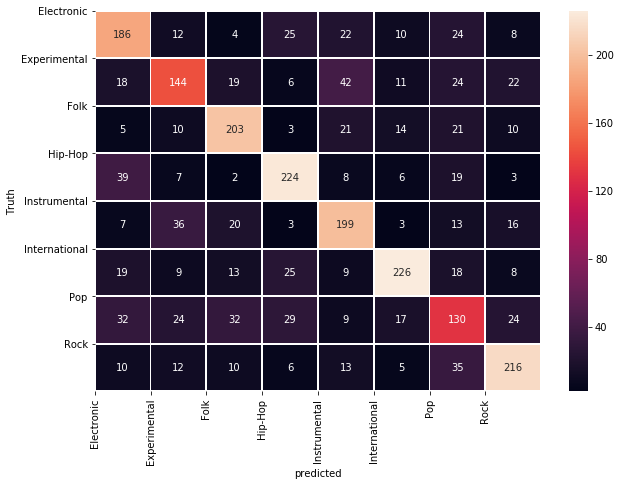

In [0]:
import seaborn as sns
lgbmcm = metrics.confusion_matrix(testY, outputlgbm1)

plt.figure(figsize=(10,7))
sns.heatmap(lgbmcm,annot=True,linewidths=1, fmt = 'd')
plt.xticks(np.arange(8), ('Electronic','Experimental','Folk','Hip-Hop','Instrumental','International','Pop','Rock'), rotation = 90, )
plt.yticks(np.arange(8), ('Electronic','Experimental','Folk','Hip-Hop','Instrumental','International','Pop','Rock'), rotation = 0)
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [0]:
!pip install --user --upgrade scikit-learn==0.22

Requirement already up-to-date: scikit-learn==0.22 in /root/.local/lib/python3.6/site-packages (0.22)


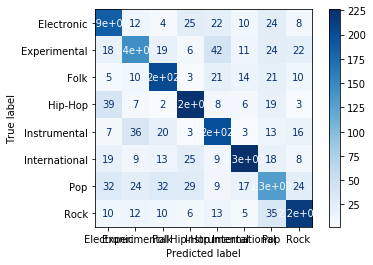

In [0]:
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.2f}'.format
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lgbm1, testX, testY,
                              display_labels= ['Electronic','Experimental','Folk','Hip-Hop','Instrumental','International','Pop','Rock'],
                              cmap=plt.cm.Blues,
                              normalize=None)

plt.show()

In [0]:
lgbm2 = LGBMClassifier(boosting_type='dart', n_estimators=100)

In [0]:
lgbm2.fit(trainX,trainY)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
outputlgbm2 = lgbm2.predict(testX)

In [0]:
accuracy_score(testY, outputlgbm2)

0.58

In [0]:
print(metrics.classification_report(testY, outputlgbm2))

               precision    recall  f1-score   support

   Electronic       0.52      0.62      0.56       291
 Experimental       0.54      0.45      0.49       286
         Folk       0.63      0.65      0.64       287
      Hip-Hop       0.64      0.64      0.64       308
 Instrumental       0.56      0.61      0.59       297
International       0.69      0.59      0.64       327
          Pop       0.41      0.39      0.40       297
         Rock       0.64      0.68      0.66       307

     accuracy                           0.58      2400
    macro avg       0.58      0.58      0.58      2400
 weighted avg       0.58      0.58      0.58      2400

